# Sleep Stage Classification – Evaluation Visualizations

This notebook generates visualizations for the **mulEEG** sleep stage classification evaluation results.

**Data source:** `custom/results/per_patient_results.csv` and `custom/results/evaluation_summary.txt`

Run all cells in order to produce all charts.

## 1. Setup – Imports & Configuration

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.colors import LinearSegmentedColormap
import warnings
warnings.filterwarnings('ignore')

# ── Paths ──────────────────────────────────────────────────────────────────
SCRIPT_DIR  = os.path.dirname(os.path.abspath('__file__'))   # notebook directory
RESULTS_DIR = os.path.join(SCRIPT_DIR, 'results')
VIZ_DIR     = os.path.join(RESULTS_DIR, 'visualizations')
os.makedirs(VIZ_DIR, exist_ok=True)

CSV_PATH     = os.path.join(RESULTS_DIR, 'per_patient_results.csv')
SUMMARY_PATH = os.path.join(RESULTS_DIR, 'evaluation_summary.txt')

# ── Sleep stage labels ─────────────────────────────────────────────────────
STAGE_LABELS = [0, 1, 2, 3, 4]          # numeric codes
STAGE_NAMES  = ['Wake', 'N1', 'N2', 'N3', 'REM']
STAGE_COLORS = ['#e74c3c', '#3498db', '#2ecc71', '#9b59b6', '#f39c12']

# ── Global plot style ──────────────────────────────────────────────────────
plt.rcParams.update({
    'figure.dpi'      : 120,
    'font.size'       : 11,
    'axes.titlesize'  : 14,
    'axes.labelsize'  : 12,
    'axes.spines.top' : False,
    'axes.spines.right': False,
})

print('✓ Setup complete')
print(f'  Results dir : {RESULTS_DIR}')
print(f'  Viz output  : {VIZ_DIR}')

✓ Setup complete
  Results dir : /home/nummm/Documents/CEPP/mulEEG/custom/results
  Viz output  : /home/nummm/Documents/CEPP/mulEEG/custom/results/visualizations


## 2. Load Data

In [2]:
# ── Per-patient CSV ────────────────────────────────────────────────────────
df = pd.read_csv(CSV_PATH)
print(f'Loaded {len(df)} patient records')
print(df.head())

# ── Overall metrics from summary file ─────────────────────────────────────
overall = {}
with open(SUMMARY_PATH) as f:
    for line in f:
        line = line.strip()
        if line.startswith('Overall Accuracy'):
            overall['Accuracy']         = float(line.split(':')[1])
        elif line.startswith('Overall Macro F1'):
            overall['Macro F1']         = float(line.split(':')[1])
        elif line.startswith('Overall Weighted F1'):
            overall['Weighted F1']      = float(line.split(':')[1])
        elif line.startswith('Overall Kappa'):
            overall['Cohen\'s Kappa']   = float(line.split(':')[1])
        elif line.startswith('Overall Balanced Acc'):
            overall['Balanced Acc']     = float(line.split(':')[1])

print('\nOverall metrics:')
for k, v in overall.items():
    print(f'  {k}: {v:.4f}')

# ── Per-class metrics from summary file ───────────────────────────────────
# Parse the classification report block
per_class = {name: {'precision': 0.0, 'recall': 0.0, 'f1': 0.0, 'support': 0}
             for name in STAGE_NAMES}
with open(SUMMARY_PATH) as f:
    lines = f.readlines()

in_report = False
for line in lines:
    stripped = line.strip()
    if stripped.startswith('precision') and 'recall' in stripped:
        in_report = True
        continue
    if in_report:
        for name in STAGE_NAMES:
            if stripped.startswith(name):
                parts = stripped.split()
                if len(parts) >= 5:
                    per_class[name] = {
                        'precision': float(parts[1]),
                        'recall'   : float(parts[2]),
                        'f1'       : float(parts[3]),
                        'support'  : int(parts[4]),
                    }
        if stripped.startswith('accuracy') or stripped.startswith('macro avg'):
            in_report = False

print('\nPer-class metrics:')
for name, m in per_class.items():
    print(f'  {name:6s}  P={m["precision"]:.4f}  R={m["recall"]:.4f}  F1={m["f1"]:.4f}  n={m["support"]}')

Loaded 27 patient records
        patient_id  n_epochs  accuracy  macro_f1  weighted_f1  kappa  \
0  00000399-159547       738  0.115176  0.041312     0.023791    0.0   
1  00000401-159547       844  0.043839  0.016799     0.003682    0.0   
2  00000403-159547       865  0.097110  0.035406     0.017191    0.0   
3  00000405-159547       891  0.085297  0.031437     0.013408    0.0   
4  00000407-159547       906  0.105960  0.038323     0.020304    0.0   

   balanced_acc  f1_wake     f1_n1  f1_n2  f1_n3  f1_rem  
0           0.2      0.0  0.206561    0.0    0.0     0.0  
1           0.2      0.0  0.083995    0.0    0.0     0.0  
2           0.2      0.0  0.177028    0.0    0.0     0.0  
3           0.2      0.0  0.157187    0.0    0.0     0.0  
4           0.2      0.0  0.191617    0.0    0.0     0.0  

Overall metrics:
  Accuracy: 0.0731
  Macro F1: 0.0272
  Weighted F1: 0.0100
  Cohen's Kappa: 0.0000
  Balanced Acc: 0.2000

Per-class metrics:
  Wake    P=0.0000  R=0.0000  F1=0.0000  n

## 3. Visualization 1 – Confusion Matrix (from saved PNG)

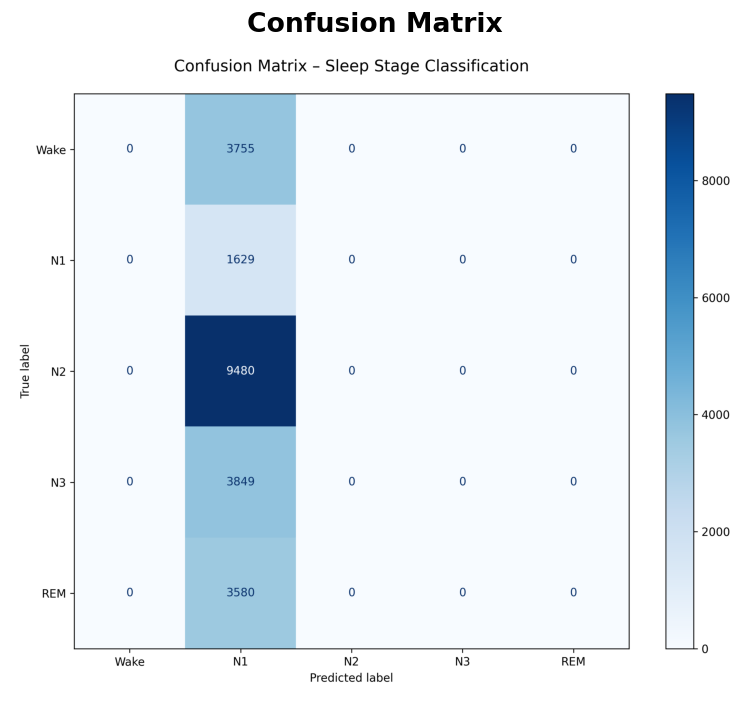

✓ Confusion matrix displayed


In [3]:
cm_path = os.path.join(RESULTS_DIR, 'confusion_matrix.png')

if os.path.exists(cm_path):
    img = plt.imread(cm_path)
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.imshow(img)
    ax.axis('off')
    ax.set_title('Confusion Matrix', fontsize=16, fontweight='bold', pad=12)
    plt.tight_layout()
    plt.savefig(os.path.join(VIZ_DIR, '01_confusion_matrix.png'), bbox_inches='tight')
    plt.show()
    print('✓ Confusion matrix displayed')
else:
    print(f'⚠ Confusion matrix PNG not found at: {cm_path}')
    print('  (Run evaluate.py first to generate it)')

## 4. Visualization 2 – Per-Class Performance (Precision / Recall / F1)

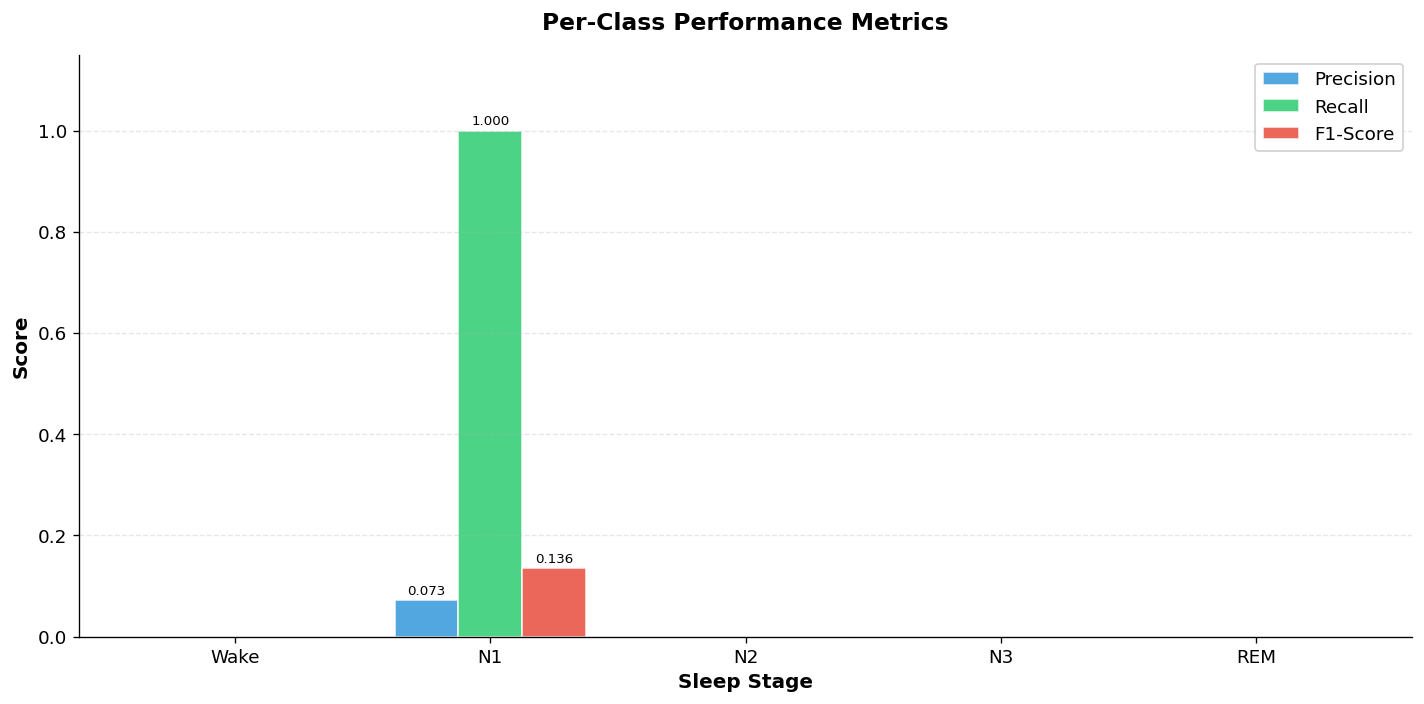

✓ Per-class metrics chart saved


In [4]:
precisions = [per_class[n]['precision'] for n in STAGE_NAMES]
recalls    = [per_class[n]['recall']    for n in STAGE_NAMES]
f1s        = [per_class[n]['f1']        for n in STAGE_NAMES]

x     = np.arange(len(STAGE_NAMES))
width = 0.25

fig, ax = plt.subplots(figsize=(12, 6))

b1 = ax.bar(x - width, precisions, width, label='Precision', color='#3498db', alpha=0.85, edgecolor='white')
b2 = ax.bar(x,         recalls,    width, label='Recall',    color='#2ecc71', alpha=0.85, edgecolor='white')
b3 = ax.bar(x + width, f1s,        width, label='F1-Score',  color='#e74c3c', alpha=0.85, edgecolor='white')

def label_bars(bars):
    for bar in bars:
        h = bar.get_height()
        if h > 0.005:
            ax.text(bar.get_x() + bar.get_width() / 2., h + 0.005,
                    f'{h:.3f}', ha='center', va='bottom', fontsize=8)

label_bars(b1); label_bars(b2); label_bars(b3)

ax.set_xlabel('Sleep Stage', fontweight='bold')
ax.set_ylabel('Score',       fontweight='bold')
ax.set_title('Per-Class Performance Metrics', fontweight='bold', pad=15)
ax.set_xticks(x)
ax.set_xticklabels(STAGE_NAMES)
ax.set_ylim(0, 1.15)
ax.legend(loc='upper right', framealpha=0.9)
ax.grid(axis='y', alpha=0.3, linestyle='--')

plt.tight_layout()
plt.savefig(os.path.join(VIZ_DIR, '02_per_class_metrics.png'), bbox_inches='tight')
plt.show()
print('✓ Per-class metrics chart saved')

## 5. Visualization 3 – Overall Model Performance

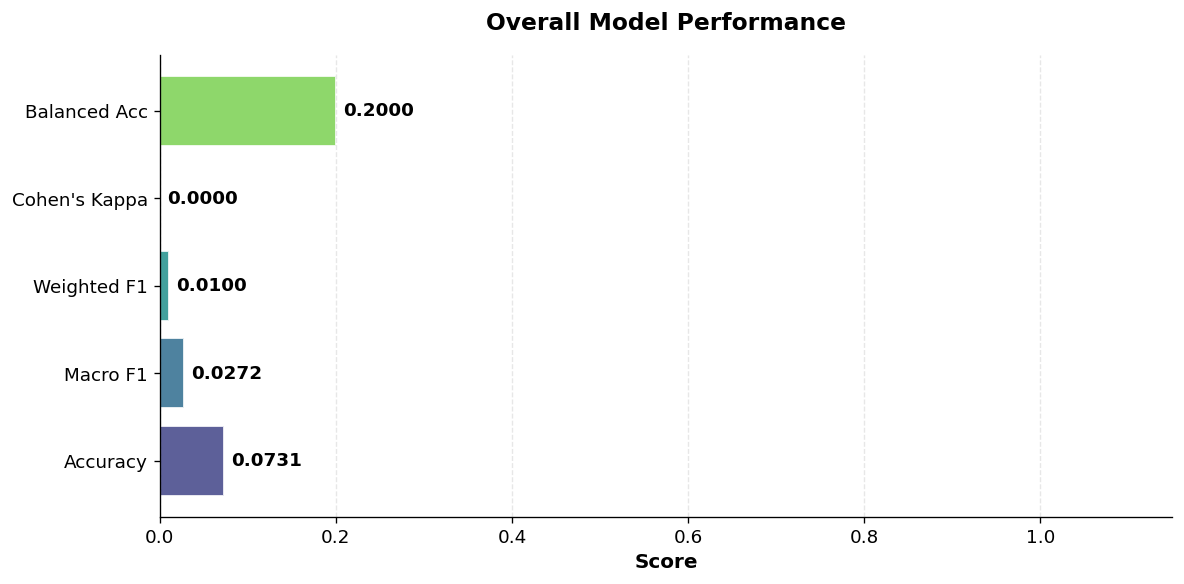

✓ Overall metrics chart saved


In [5]:
metric_names  = list(overall.keys())
metric_values = list(overall.values())
colors_grad   = plt.cm.viridis(np.linspace(0.2, 0.8, len(metric_names)))

fig, ax = plt.subplots(figsize=(10, 5))
bars = ax.barh(metric_names, metric_values, color=colors_grad, alpha=0.85,
               edgecolor='white', linewidth=1.2)

for bar, val in zip(bars, metric_values):
    ax.text(val + 0.008, bar.get_y() + bar.get_height() / 2.,
            f'{val:.4f}', va='center', fontsize=11, fontweight='bold')

ax.set_xlabel('Score', fontweight='bold')
ax.set_title('Overall Model Performance', fontweight='bold', pad=15)
ax.set_xlim(0, 1.15)
ax.grid(axis='x', alpha=0.3, linestyle='--')

plt.tight_layout()
plt.savefig(os.path.join(VIZ_DIR, '03_overall_metrics.png'), bbox_inches='tight')
plt.show()
print('✓ Overall metrics chart saved')

## 6. Visualization 4 – Sleep Stage Support Distribution

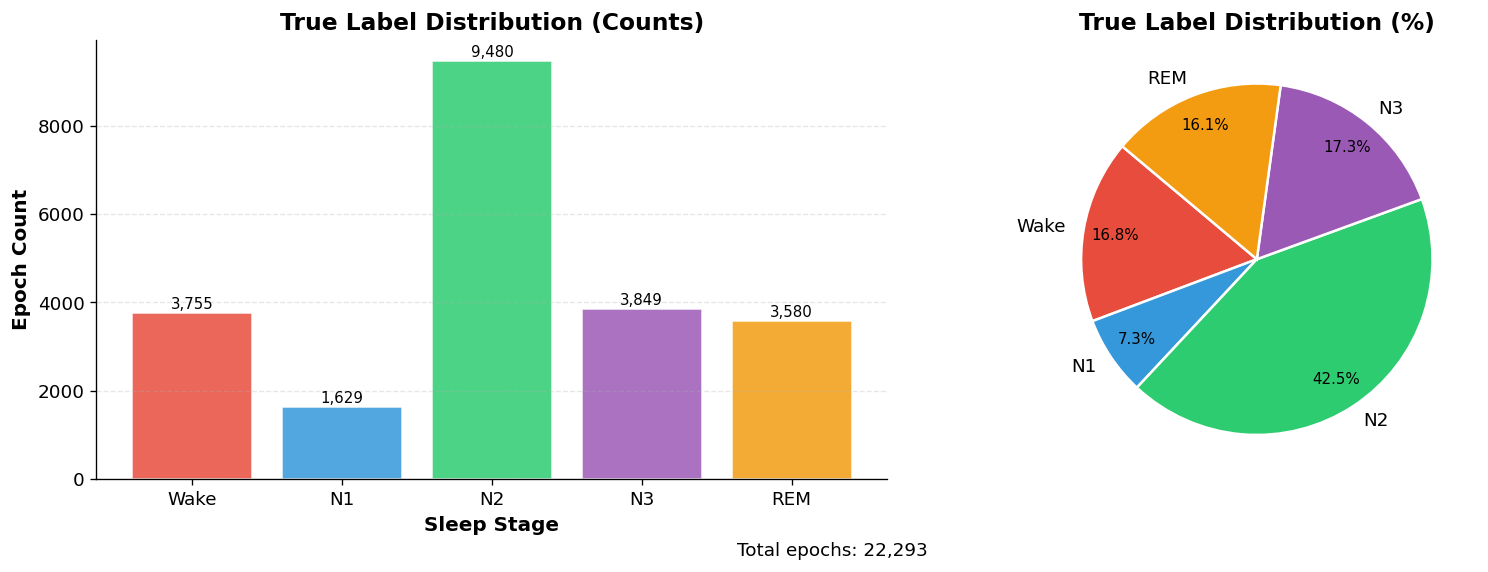

✓ Stage distribution chart saved


In [6]:
supports = [per_class[n]['support'] for n in STAGE_NAMES]
total    = sum(supports)
pcts     = [s / total * 100 for s in supports]

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# ── Left: bar chart of counts ──────────────────────────────────────────────
bars = axes[0].bar(STAGE_NAMES, supports, color=STAGE_COLORS, alpha=0.85, edgecolor='white')
for bar, cnt in zip(bars, supports):
    axes[0].text(bar.get_x() + bar.get_width() / 2., bar.get_height() + 30,
                 f'{cnt:,}', ha='center', va='bottom', fontsize=9)
axes[0].set_xlabel('Sleep Stage', fontweight='bold')
axes[0].set_ylabel('Epoch Count',  fontweight='bold')
axes[0].set_title('True Label Distribution (Counts)', fontweight='bold')
axes[0].grid(axis='y', alpha=0.3, linestyle='--')

# ── Right: pie chart ───────────────────────────────────────────────────────
wedges, texts, autotexts = axes[1].pie(
    supports, labels=STAGE_NAMES, colors=STAGE_COLORS,
    autopct='%1.1f%%', startangle=140, pctdistance=0.82,
    wedgeprops=dict(edgecolor='white', linewidth=1.5)
)
for at in autotexts:
    at.set_fontsize(9)
axes[1].set_title('True Label Distribution (%)', fontweight='bold')

plt.suptitle(f'Total epochs: {total:,}', fontsize=11, y=0.02)
plt.tight_layout()
plt.savefig(os.path.join(VIZ_DIR, '04_stage_distribution.png'), bbox_inches='tight')
plt.show()
print('✓ Stage distribution chart saved')

## 7. Visualization 5 – Per-Patient Accuracy Distribution

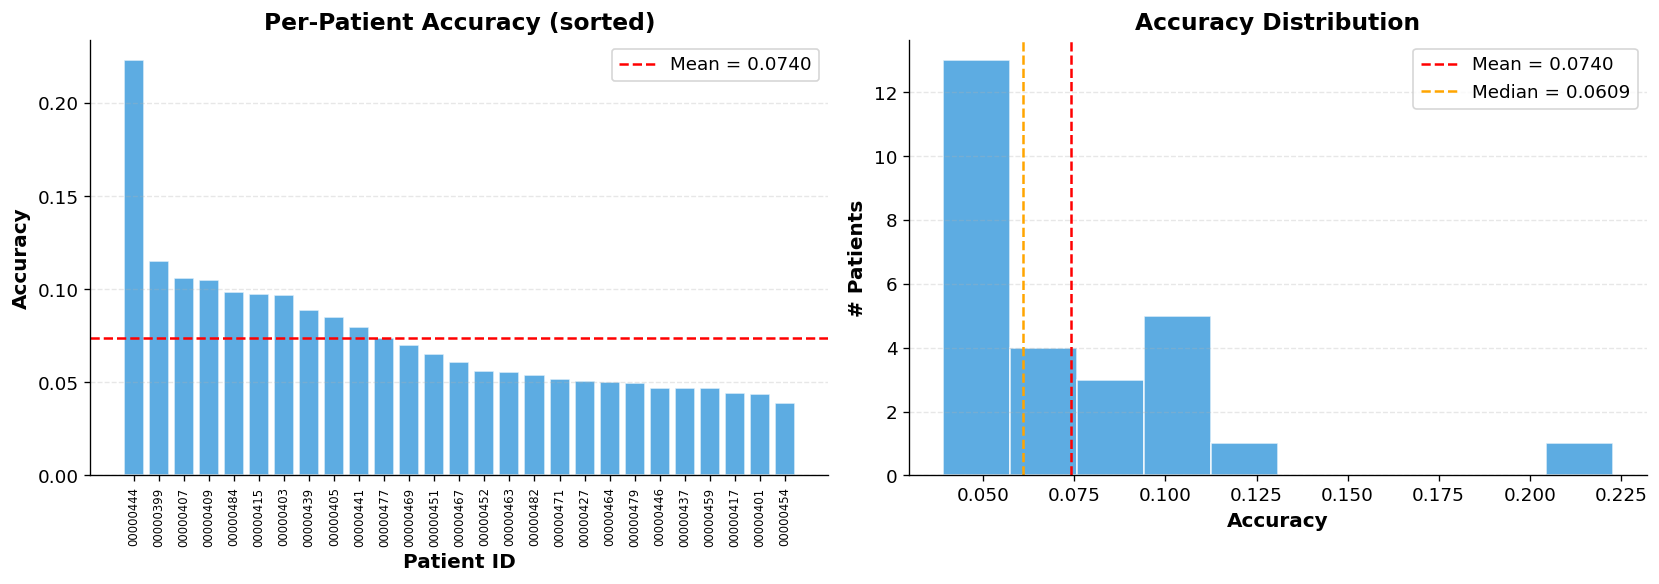

✓ Per-patient accuracy chart saved


In [7]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# ── Left: sorted bar chart ─────────────────────────────────────────────────
df_sorted = df.sort_values('accuracy', ascending=False).reset_index(drop=True)
short_ids = [pid.split('-')[0] for pid in df_sorted['patient_id']]

bars = axes[0].bar(range(len(df_sorted)), df_sorted['accuracy'],
                   color='#3498db', alpha=0.8, edgecolor='white')
axes[0].axhline(df['accuracy'].mean(), color='red', linestyle='--', linewidth=1.5,
                label=f'Mean = {df["accuracy"].mean():.4f}')
axes[0].set_xticks(range(len(df_sorted)))
axes[0].set_xticklabels(short_ids, rotation=90, fontsize=7)
axes[0].set_xlabel('Patient ID', fontweight='bold')
axes[0].set_ylabel('Accuracy',   fontweight='bold')
axes[0].set_title('Per-Patient Accuracy (sorted)', fontweight='bold')
axes[0].legend()
axes[0].grid(axis='y', alpha=0.3, linestyle='--')

# ── Right: histogram ───────────────────────────────────────────────────────
axes[1].hist(df['accuracy'], bins=10, color='#3498db', alpha=0.8, edgecolor='white')
axes[1].axvline(df['accuracy'].mean(), color='red', linestyle='--', linewidth=1.5,
                label=f'Mean = {df["accuracy"].mean():.4f}')
axes[1].axvline(df['accuracy'].median(), color='orange', linestyle='--', linewidth=1.5,
                label=f'Median = {df["accuracy"].median():.4f}')
axes[1].set_xlabel('Accuracy',     fontweight='bold')
axes[1].set_ylabel('# Patients',   fontweight='bold')
axes[1].set_title('Accuracy Distribution', fontweight='bold')
axes[1].legend()
axes[1].grid(axis='y', alpha=0.3, linestyle='--')

plt.tight_layout()
plt.savefig(os.path.join(VIZ_DIR, '05_per_patient_accuracy.png'), bbox_inches='tight')
plt.show()
print('✓ Per-patient accuracy chart saved')

## 8. Visualization 6 – Per-Patient F1 (Macro) Distribution

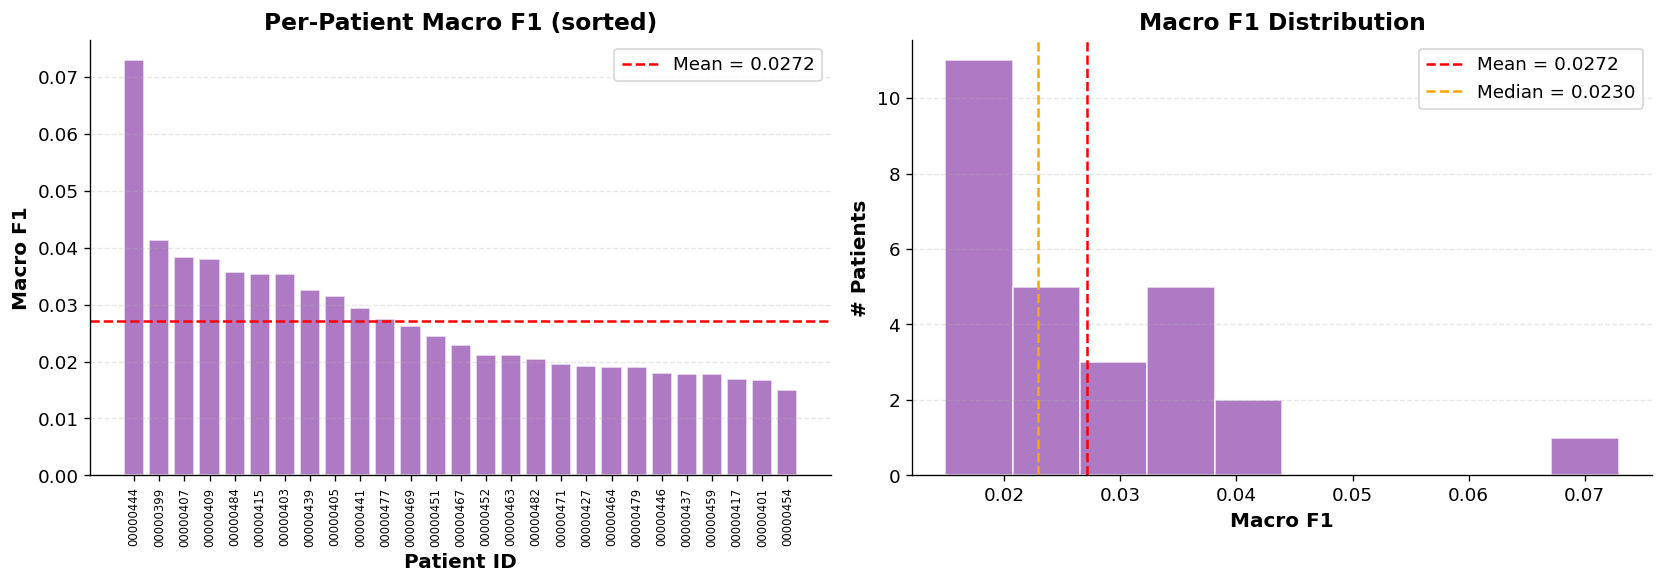

✓ Per-patient F1 chart saved


In [8]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

df_sorted_f1 = df.sort_values('macro_f1', ascending=False).reset_index(drop=True)
short_ids_f1 = [pid.split('-')[0] for pid in df_sorted_f1['patient_id']]

# ── Left: sorted bar ──────────────────────────────────────────────────────
axes[0].bar(range(len(df_sorted_f1)), df_sorted_f1['macro_f1'],
            color='#9b59b6', alpha=0.8, edgecolor='white')
axes[0].axhline(df['macro_f1'].mean(), color='red', linestyle='--', linewidth=1.5,
                label=f'Mean = {df["macro_f1"].mean():.4f}')
axes[0].set_xticks(range(len(df_sorted_f1)))
axes[0].set_xticklabels(short_ids_f1, rotation=90, fontsize=7)
axes[0].set_xlabel('Patient ID',  fontweight='bold')
axes[0].set_ylabel('Macro F1',    fontweight='bold')
axes[0].set_title('Per-Patient Macro F1 (sorted)', fontweight='bold')
axes[0].legend()
axes[0].grid(axis='y', alpha=0.3, linestyle='--')

# ── Right: histogram ───────────────────────────────────────────────────────
axes[1].hist(df['macro_f1'], bins=10, color='#9b59b6', alpha=0.8, edgecolor='white')
axes[1].axvline(df['macro_f1'].mean(), color='red', linestyle='--', linewidth=1.5,
                label=f'Mean = {df["macro_f1"].mean():.4f}')
axes[1].axvline(df['macro_f1'].median(), color='orange', linestyle='--', linewidth=1.5,
                label=f'Median = {df["macro_f1"].median():.4f}')
axes[1].set_xlabel('Macro F1',    fontweight='bold')
axes[1].set_ylabel('# Patients',  fontweight='bold')
axes[1].set_title('Macro F1 Distribution', fontweight='bold')
axes[1].legend()
axes[1].grid(axis='y', alpha=0.3, linestyle='--')

plt.tight_layout()
plt.savefig(os.path.join(VIZ_DIR, '06_per_patient_f1.png'), bbox_inches='tight')
plt.show()
print('✓ Per-patient F1 chart saved')

## 9. Visualization 7 – Per-Patient N1 F1 Score (the only non-zero class)

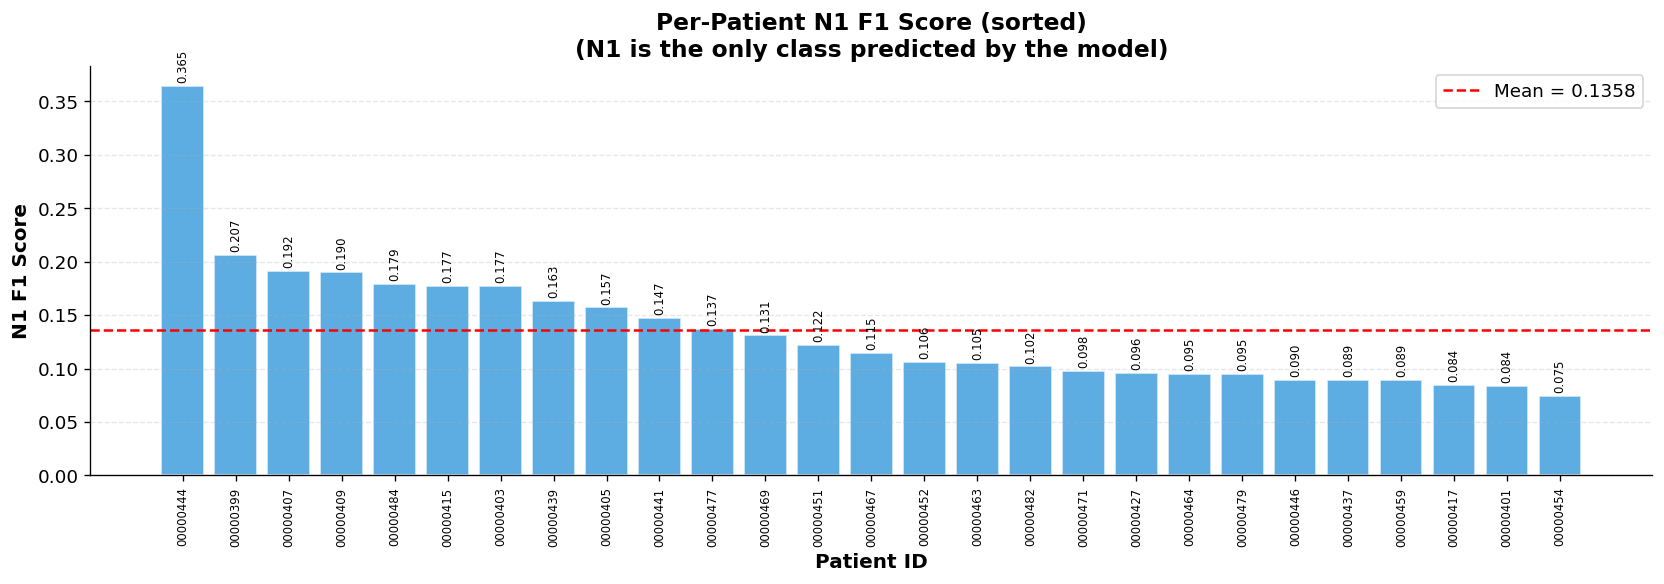

✓ Per-patient N1 F1 chart saved


In [9]:
fig, ax = plt.subplots(figsize=(14, 5))

df_sorted_n1 = df.sort_values('f1_n1', ascending=False).reset_index(drop=True)
short_ids_n1 = [pid.split('-')[0] for pid in df_sorted_n1['patient_id']]

bars = ax.bar(range(len(df_sorted_n1)), df_sorted_n1['f1_n1'],
              color='#3498db', alpha=0.8, edgecolor='white')
ax.axhline(df['f1_n1'].mean(), color='red', linestyle='--', linewidth=1.5,
           label=f'Mean = {df["f1_n1"].mean():.4f}')

for bar, val in zip(bars, df_sorted_n1['f1_n1']):
    if val > 0.01:
        ax.text(bar.get_x() + bar.get_width() / 2., bar.get_height() + 0.003,
                f'{val:.3f}', ha='center', va='bottom', fontsize=7, rotation=90)

ax.set_xticks(range(len(df_sorted_n1)))
ax.set_xticklabels(short_ids_n1, rotation=90, fontsize=7)
ax.set_xlabel('Patient ID', fontweight='bold')
ax.set_ylabel('N1 F1 Score', fontweight='bold')
ax.set_title('Per-Patient N1 F1 Score (sorted)\n'
             '(N1 is the only class predicted by the model)', fontweight='bold')
ax.legend()
ax.grid(axis='y', alpha=0.3, linestyle='--')

plt.tight_layout()
plt.savefig(os.path.join(VIZ_DIR, '07_per_patient_n1_f1.png'), bbox_inches='tight')
plt.show()
print('✓ Per-patient N1 F1 chart saved')

## 10. Visualization 8 – Epoch Count vs Accuracy (Scatter)

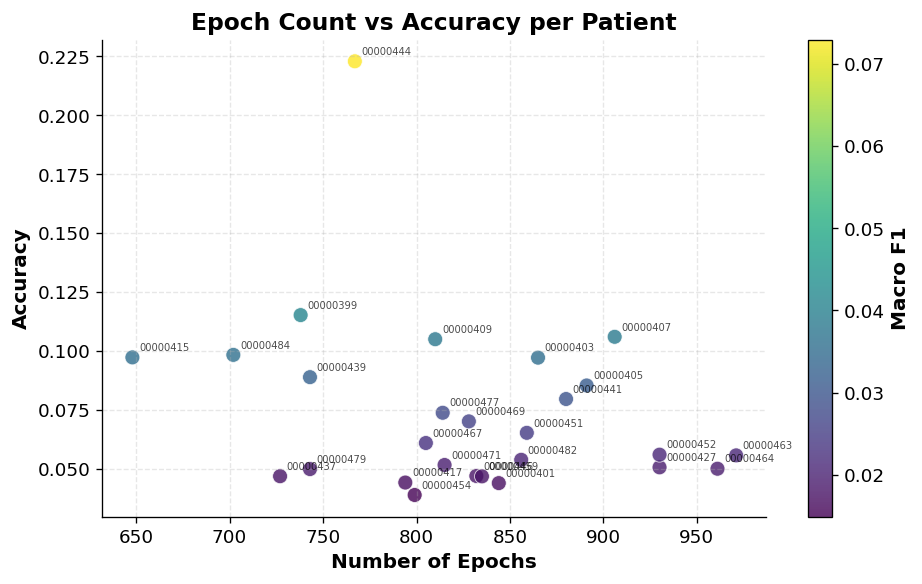

✓ Scatter chart saved


In [10]:
fig, ax = plt.subplots(figsize=(8, 5))

sc = ax.scatter(df['n_epochs'], df['accuracy'],
                c=df['macro_f1'], cmap='viridis',
                s=80, alpha=0.8, edgecolors='white', linewidths=0.5)
cbar = plt.colorbar(sc, ax=ax)
cbar.set_label('Macro F1', fontweight='bold')

# Annotate patient IDs
for _, row in df.iterrows():
    ax.annotate(row['patient_id'].split('-')[0],
                (row['n_epochs'], row['accuracy']),
                textcoords='offset points', xytext=(4, 4), fontsize=6, alpha=0.7)

ax.set_xlabel('Number of Epochs', fontweight='bold')
ax.set_ylabel('Accuracy',         fontweight='bold')
ax.set_title('Epoch Count vs Accuracy per Patient', fontweight='bold')
ax.grid(alpha=0.3, linestyle='--')

plt.tight_layout()
plt.savefig(os.path.join(VIZ_DIR, '08_epochs_vs_accuracy.png'), bbox_inches='tight')
plt.show()
print('✓ Scatter chart saved')

## 11. Visualization 9 – Summary Statistics Table

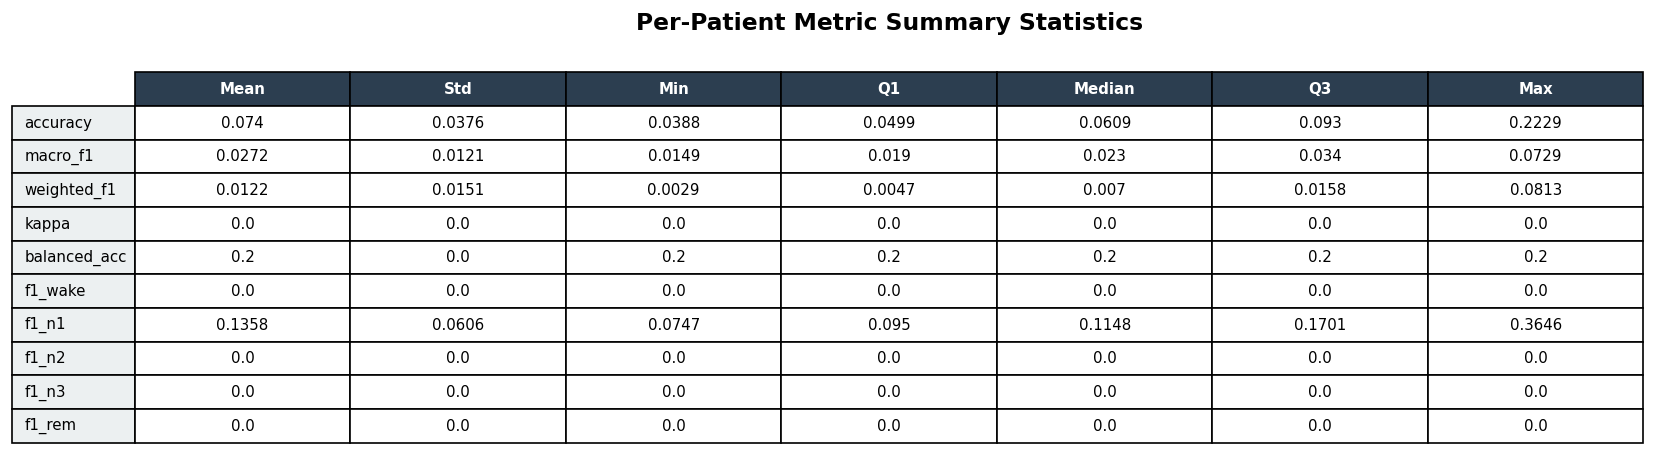

✓ Summary table saved

                Mean     Std     Min      Q1  Median      Q3     Max
accuracy      0.0740  0.0376  0.0388  0.0499  0.0609  0.0930  0.2229
macro_f1      0.0272  0.0121  0.0149  0.0190  0.0230  0.0340  0.0729
weighted_f1   0.0122  0.0151  0.0029  0.0047  0.0070  0.0158  0.0813
kappa         0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000
balanced_acc  0.2000  0.0000  0.2000  0.2000  0.2000  0.2000  0.2000
f1_wake       0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000
f1_n1         0.1358  0.0606  0.0747  0.0950  0.1148  0.1701  0.3646
f1_n2         0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000
f1_n3         0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000
f1_rem        0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000


In [11]:
metric_cols = ['accuracy', 'macro_f1', 'weighted_f1', 'kappa', 'balanced_acc',
               'f1_wake', 'f1_n1', 'f1_n2', 'f1_n3', 'f1_rem']
summary_df = df[metric_cols].describe().T[['mean', 'std', 'min', '25%', '50%', '75%', 'max']]
summary_df.columns = ['Mean', 'Std', 'Min', 'Q1', 'Median', 'Q3', 'Max']
summary_df = summary_df.round(4)

fig, ax = plt.subplots(figsize=(14, 4))
ax.axis('off')

tbl = ax.table(
    cellText  = summary_df.values,
    rowLabels = summary_df.index,
    colLabels = summary_df.columns,
    cellLoc   = 'center',
    loc       = 'center',
)
tbl.auto_set_font_size(False)
tbl.set_fontsize(9)
tbl.scale(1.2, 1.6)

# Style header row
for j in range(len(summary_df.columns)):
    tbl[0, j].set_facecolor('#2c3e50')
    tbl[0, j].set_text_props(color='white', fontweight='bold')

# Style row labels
for i in range(len(summary_df)):
    tbl[i + 1, -1].set_facecolor('#ecf0f1')

ax.set_title('Per-Patient Metric Summary Statistics', fontweight='bold', pad=20, fontsize=14)
plt.tight_layout()
plt.savefig(os.path.join(VIZ_DIR, '09_summary_table.png'), bbox_inches='tight')
plt.show()
print('✓ Summary table saved')
print()
print(summary_df.to_string())

## 12. Visualization 10 – Radar / Spider Chart of Overall Metrics

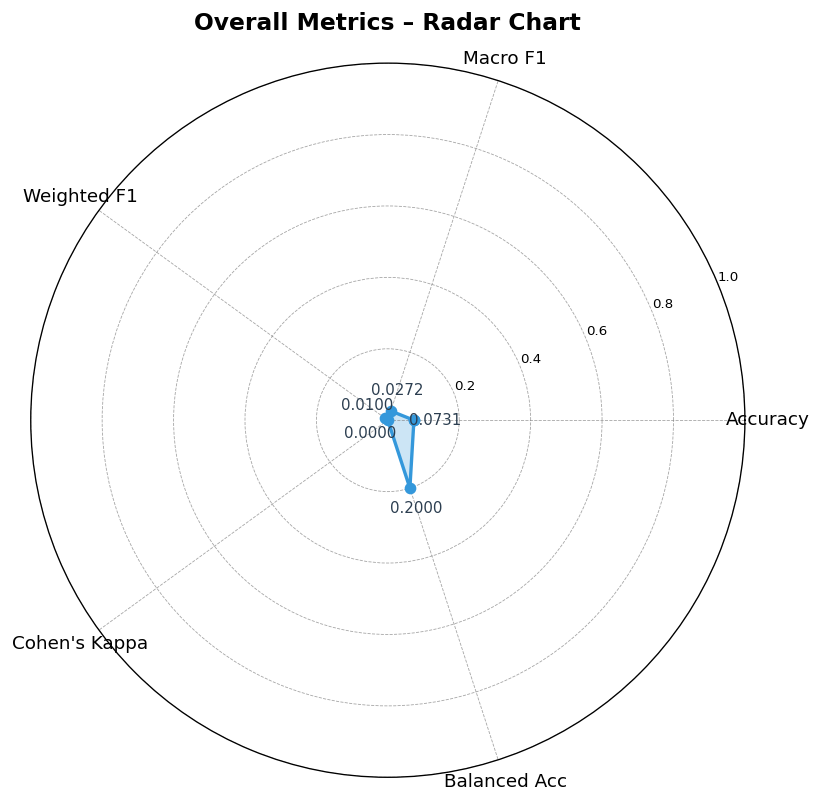

✓ Radar chart saved


In [12]:
labels  = list(overall.keys())
values  = list(overall.values())
N       = len(labels)
angles  = np.linspace(0, 2 * np.pi, N, endpoint=False).tolist()

# Close the polygon
values_plot  = values  + [values[0]]
angles_plot  = angles  + [angles[0]]
labels_plot  = labels  + [labels[0]]

fig, ax = plt.subplots(figsize=(7, 7), subplot_kw=dict(polar=True))

ax.plot(angles_plot, values_plot, 'o-', linewidth=2, color='#3498db')
ax.fill(angles_plot, values_plot, alpha=0.25, color='#3498db')

ax.set_thetagrids(np.degrees(angles), labels)
ax.set_ylim(0, 1)
ax.set_yticks([0.2, 0.4, 0.6, 0.8, 1.0])
ax.set_yticklabels(['0.2', '0.4', '0.6', '0.8', '1.0'], fontsize=8)
ax.set_title('Overall Metrics – Radar Chart', fontweight='bold', pad=20)
ax.grid(color='grey', linestyle='--', linewidth=0.5, alpha=0.7)

# Annotate values
for angle, val, label in zip(angles, values, labels):
    ax.annotate(f'{val:.4f}',
                xy=(angle, val),
                xytext=(angle, val + 0.06),
                ha='center', va='center', fontsize=9, color='#2c3e50')

plt.tight_layout()
plt.savefig(os.path.join(VIZ_DIR, '10_radar_chart.png'), bbox_inches='tight')
plt.show()
print('✓ Radar chart saved')

## 13. Summary – All Saved Visualizations

In [13]:
saved = sorted(os.listdir(VIZ_DIR))
print(f'Visualizations saved to: {VIZ_DIR}')
print(f'Total files: {len(saved)}')
for f in saved:
    fpath = os.path.join(VIZ_DIR, f)
    size  = os.path.getsize(fpath) / 1024
    print(f'  {f}  ({size:.1f} KB)')

Visualizations saved to: /home/nummm/Documents/CEPP/mulEEG/custom/results/visualizations
Total files: 10
  01_confusion_matrix.png  (39.4 KB)
  02_per_class_metrics.png  (33.2 KB)
  03_overall_metrics.png  (34.0 KB)
  04_stage_distribution.png  (67.2 KB)
  05_per_patient_accuracy.png  (59.0 KB)
  06_per_patient_f1.png  (61.7 KB)
  07_per_patient_n1_f1.png  (60.4 KB)
  08_epochs_vs_accuracy.png  (67.9 KB)
  09_summary_table.png  (45.0 KB)
  10_radar_chart.png  (84.9 KB)
